In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

In [2]:
marvel = pd.read_csv("marvel.csv")

## Creating the Marvel Partners Graph

In [3]:
def createGraphFromDataFrame(df):
    marvel_graph = nx.DiGraph() # this creates a directed graph object

    list_ = []

    # This loop creates the edges for the plot & appends them to a list
    for index, row in marvel.iterrows():
        list_.append((row["source"] , row["target"]))

    marvel_graph.add_edges_from(list_)

    return marvel_graph

## Creating the Marvel Graph adjacency matrix

In [4]:
def createAdjacencyMatrix(graph):
    marvel_adj = nx.to_numpy_array(graph) # This creates the adjacency array for the digraph
    return marvel_adj

# Degree Frequency Distribution

In [5]:
# In degrees
def createDegreeFrequencyDist(graph, binsizes, inOrOut):
    adj = createAdjacencyMatrix(graph)
    row_sums = adj.sum(axis=0)            # This finds the different degrees for each node in a node
    col_sums = adj.sum(axis=1)            # This finds the different degrees for each node in a column
    fig, ax = plt.subplots(1,3, figsize = (24,8))

    titleString = "Degree Distributions for Binsizes "
    if inOrOut == "In":
        for i,e in enumerate(binsizes):
            titleString += str(e)
            n, bins, patches = ax[i].hist(row_sums, bins=np.arange(e))
            ax[i].set(xlabel="Degrees", ylabel="Frequency", title=titleString)

        plt.show()
        
        # Out Degrees
    else:
        fig, ax = plt.subplots(1,3, figsize = (24,8))

        for i,e in enumerate(binsize):
            n, bins, patches = ax[i].hist(col_sums, bins=np.arange(e))  
            ax[i].set(xlabel="Degrees", ylabel="Frequency", title="Degree Distributions for Binsizes 10, 20, 30")

        plt.show()

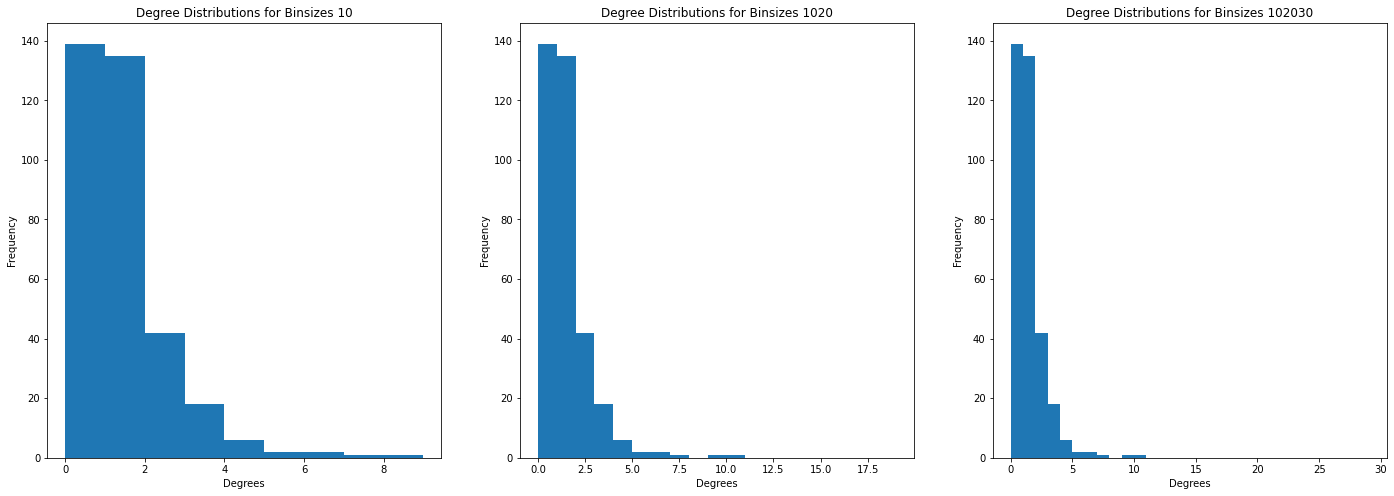

In [6]:
g = createGraphFromDataFrame(marvel)
createDegreeFrequencyDist(g, [10, 20, 30], "In")

# Graph Densities

The density of a graph represents the ratio between the edges present in a graph and the maximum number of edges that at that the graph can contain.

The density for undirected graphs is 

$$d = \frac{2m}{n(n-1)}$$

and for directed graphs is

$$d = \frac{m}{n(n-1)}$$

where $n$ is the number of nodes and $m$ is the number of edges in the graph.

The `density(G)` method finds these densities.

In [7]:
def density(graph):
    density = nx.density(graph)
    return density

# Clustering Coefficient
A clustering coefficient measures the degree to which nodes in a graph tend to cluster together.

For unweighted graphs, the clustering of a node _$u$_ is the fraction of possible triangles through that node that exists. In other words, how many triangles can you create with that node from other trangles and nodes.

$$c_u = \frac{2T(u)}{deg(u)(deg(u) - 1)} \Sigma_{vw}(\hat{w}_{uv}\hat{w}_{uw}\hat{w}_{vw})^{\frac{1}{3}}$$

The `clustering(G, nodes=None, weight=None)` finds the clustering coefficients.

In [8]:
def findClusters(graph):
    cluster_coefficient = nx.clustering(graph)
    return cluster_coefficient

# Node Ranking Measures

In [9]:
# Number of degrees

def centralityMeasure(g): # method is type of centrality
    return nx.degree_centrality(g)

In [10]:
#  the reciprocal of the average shortest path distance to all other nodes

def closenessCentrality(g):
    return nx.closeness_centrality(g)

In [11]:
# The local reaching centrality of a node in a directed graph is the proportion of other nodes reachable from that node

def globalReachingCentrality(g):
    return nx.global_reaching_centrality(g)


In [12]:
# Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors.

def eigenvectCentrality(g):
    return nx.eigenvector_centrality(g)

In [13]:
eigenvectCentrality(g)

{'Baron Zemo': 4.517483771567172e-10,
 'Blackout ': 1.3100702937544796e-08,
 'Vermin ': 1.3100702937544796e-08,
 "N'astirh": 4.517483771567172e-10,
 "S'ym": 1.3100702937544796e-08,
 'Belasco ': 2.0915949862356e-07,
 'Madelyne Pryor': 2.574965749793289e-08,
 'Silver Sable': 4.517483771567172e-10,
 'Peregrine ': 1.3100702937544796e-08,
 'Hope Summers ': 4.517483771567172e-10,
 'Cable ': 1.3100702937544796e-08,
 'Magik ': 4.517483771567172e-10,
 'Night Thrasher ': 4.517483771567172e-10,
 "Midnight's Fire": 1.3100702937544796e-08,
 'Silhouette ': 1.3100702937544796e-08,
 'Orb ': 4.517483771567172e-10,
 'Justin Hammer': 3.839861205832097e-08,
 'Forge ': 4.517483771567172e-10,
 'Storm ': 1.9651054406317197e-07,
 'U.S. Agent ': 4.517483771567172e-10,
 'Battlestar ': 1.3100702937544796e-08,
 'Venom ': 4.517483771567172e-10,
 'Carnage ': 1.4423422185859667e-05,
 'Doctor Doom': 3.839861205832097e-08,
 'Spider-Man': 5.591289664068686e-06,
 'Magneto ': 1.3100702937544796e-08,
 'Red Skull': 3.90265

# Cliques
A **clique** is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent. That is, a clique of a graph $G$ is an induced subgraph of $G$ that is complete.

In simple terms, all nodes connect to all nodes and there does not exist a single node with a degree of one.

# Visualizing the Marvel Character Graph

In [14]:
# Creating edges
def visualizeGraph(graph, rankingType):
    pos = nx.shell_layout(graph)
    new_pos = {}

    for vals in pos.items():
        pos.update({vals[0]: {"pos": list(vals[1])}})
    nx.set_node_attributes(graph, pos)

    edge_x = []
    edge_y = []

    for edge in graph.edges():
        x0, y0 = graph.nodes[edge[0]]['pos']
        x1, y1 = graph.nodes[edge[1]]['pos']
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in graph.nodes():
        x, y = graph.nodes[node]['pos']
        node_x.append(x)
        node_y.append(y)

    node_text = []
    for node in graph.nodes:
        node_text.append(node)

        
    colorList = []
    centralities = rankingType(graph)
    for i in graph.nodes:
        list_.append(centralities[i])
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color= colorList,
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))
    node_trace.text = node_text


    # Creating Viz
    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='<br>Marvel Character Representation',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()



In [15]:
visualizeGraph(g)

TypeError: visualizeGraph() missing 1 required positional argument: 'rankingType'

In [ ]:
list_ = []
centralities = centralityMeasure(g)
for i in g.nodes:
    list_.append(centralities[i])

list_

In [ ]:
def createCentralityHist(g):
    df = pd.DataFrame.from_dict(centralityMeasure(g), orient ='index', columns=["frequency"])
#     df = px.data.tips()
    # Here we use a column with categorical data
    fig = px.histogram(df, x="frequency", title="Centrality Measures")
    fig.show()
    

In [ ]:
createCentralityHist(g)